# Swindon Wellbeing

This script was written to provide easy interpretation of wellbeing statistics for Swindon. It has been initialised to load the data available [here](https://www.ons.gov.uk/datasets/wellbeing-local-authority/editions/time-series/versions/1) The link allows an excel file to be downloaded.

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Loading Data Required

First we load the data from the file indicated by the *MASTER_FILE* variable, the range of *MEASURES* is also defined to give the wellbeing measured to be extracted.

In [57]:
MASTER_FILE = "wellbeing_data.csv"
MEASURES = ["Anxiety", "Happiness", "Life Satisfaction", "Worthwhile"]
RATINGS = ["Poor", "Fair", "Good", "Very good"]

In [43]:
# Load data
wellbeing_data = pd.read_csv(MASTER_FILE, delimiter=',', skiprows=2)

def extract_average_data(data):
    """ Extracts the data from the PANDAS table into the measures of wellbeing. """
    measures = {}
    for m in MEASURES:
        # Get only this current measure
        m_data = data.loc[data['MeasureOfWellbeing'] == m]
        measures[m] = {}
        for score in m_data['Estimate'].unique():
            s_data = m_data.loc[m_data['Estimate'] == score]
            s_data = s_data.iloc[:, 4:].to_numpy()[0]
            measures[m][score] = np.zeros(int(s_data.shape[0]/4))
            for year in range(0, int(s_data.shape[0]/4)):
                measures[m][score][year] = s_data[year*4]
    return measures
wellbeing_data = extract_average_data(wellbeing_data)

In [63]:
pd.read_csv(MASTER_FILE, delimiter=',', skiprows=2)

,Geography,Geography code,MeasureOfWellbeing,Estimate,2011-12,Data Marking (2011-12),Lower limit (2011-12),Upper limit (2011-12),2012-13,Data Marking (2012-13),...,Lower limit (2017-18),Upper limit (2017-18),2018-19,Data Marking (2018-19),Lower limit (2018-19),Upper limit (2018-19),2019-20,Data Marking (2019-20),Lower limit (2019-20),Upper limit (2019-20)
0,Swindon,E06000030,Anxiety,Average (mean),2.96,NaN,2.74,3.17,2.79,NaN,...,2.50,2.93,2.77,NaN,2.55,2.98,3.11,NaN,2.88,3.34
1,Swindon,E06000030,Anxiety,Fair,17.79,NaN,14.96,20.62,16.44,NaN,...,12.41,17.67,15.89,NaN,13.18,18.60,18.40,NaN,15.02,21.77
2,Swindon,E06000030,Anxiety,Good,20.28,NaN,17.24,23.32,24.73,NaN,...,18.40,24.42,21.61,NaN,18.50,24.73,20.77,NaN,17.38,24.16
3,Swindon,E06000030,Anxiety,Poor,20.37,NaN,17.37,23.37,17.81,NaN,...,15.70,21.55,19.12,NaN,16.07,22.18,22.96,NaN,19.42,26.51
4,Swindon,E06000030,Anxiety,Very good,41.56,NaN,37.83,45.28,41.02,NaN,...,40.98,48.87,43.37,NaN,39.55,47.19,37.87,NaN,33.82,41.91
5,Swindon,E06000030,Happiness,Average (mean),7.33,NaN,7.14,7.51,7.36,NaN,...,7.43,7.74,7.51,NaN,7.35,7.67,7.54,NaN,7.36,7.71
6,Swindon,E06000030,Happiness,Fair,16.89,NaN,14.04,19.75,17.47,NaN,...,14.17,20.25,14.44,NaN,11.80,17.08,17.79,NaN,14.20,21.38
7,Swindon,E06000030,Happiness,Good,39.04,NaN,35.28,42.81,40.48,NaN,...,34.30,41.69,41.39,NaN,37.46,45.32,39.13,NaN,34.83,43.43
8,Swindon,E06000030,Happiness,Poor,10.75,NaN,8.18,13.33,9.53,NaN,...,5.75,9.74,9.87,NaN,7.75,11.99,7.80,NaN,5.69,9.90
9,Swindon,E06000030,Happiness,Very good,33.31,NaN,29.73,36.88,32.52,NaN,...,33.22,40.88,34.30,NaN,30.55,38.05,35.29,NaN,31.08,39.49


## Yearly Proportion of results

Stacked bar charts to show the proportion of resuts per year.

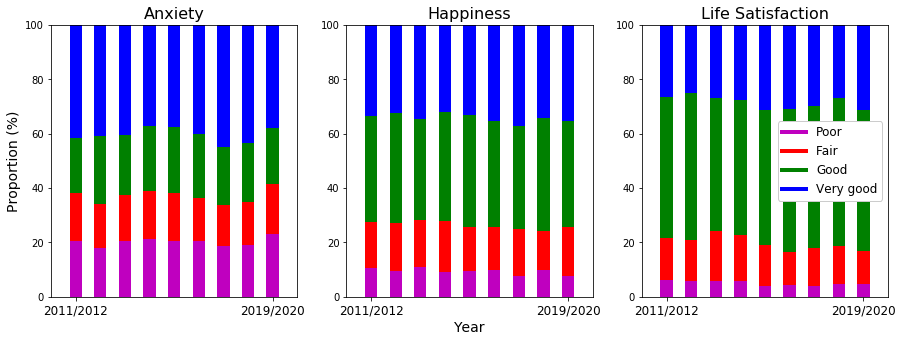

In [86]:
fig, all_axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

colours = ['m', 'r', 'g', 'b', 'c', 'y', 'k']
bar_width = 0.5

ticks = [1, 9]
labels = ["2011/2012", "2019/2020"]

for idx, m in enumerate(MEASURES[:-1]):
    axs = all_axs[idx]
    for year in range(0, wellbeing_data[m][RATINGS[0]].shape[0]):
        height = 0
        for sidx, score in enumerate(RATINGS):
            axs.bar(year+1, wellbeing_data[m][score][year],
                        bar_width, bottom=height, color=colours[sidx])
            height = height + wellbeing_data[m][score][year]
    axs.set_title(m, fontsize=16)
    axs.set_xlim([0, 10])
    axs.set_ylim([0, 100])
    axs.set_xticks(ticks)
    axs.set_xticklabels(labels, fontsize=12)

all_axs[1].set_xlabel("Year", fontsize=14)
all_axs[0].set_ylabel("Proportion (%)", fontsize=14)

bars = []
for idx, b in enumerate(RATINGS):
    bars.append(Line2D([0], [0], color=colours[idx], lw=4))

all_axs[-1].legend(bars, RATINGS,
                   loc="center right",
                   ncol=1, fontsize=12,
                   facecolor='w', framealpha=1)

In [ ]:
fig, all_axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

colours = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
bar_width = 0.4

axes=[[0,0], [1,1], [1,0], [0,1]]

for idx, area in enumerate(AREAS):
    axs = all_axs[axes[idx][0], axes[idx][1]]
    # For each week we create a separate set of bars
    for week in location_data[area][0, :].astype(int):
        previous_value = 0
        # Plot each location separately
        for dloc in range(0, len(death_locations)):
            axs.bar(week, location_data[area][1+dloc, week-1]*100,
                    bar_width, bottom=previous_value, color=colours[dloc])
            previous_value = previous_value + location_data[area][1+dloc, week-1]*100
    axs.set_xlim([10, 46])
    axs.set_title(area, fontsize=16)
all_axs[1, 0].set_xlabel("Week Number", fontsize=14)
all_axs[1, 1].set_xlabel("Week Number", fontsize=14)

all_axs[0, 0].set_ylabel("Share of total (%)", fontsize=14)
all_axs[1, 0].set_ylabel("Share of total (%)", fontsize=14)

# Overly complicated legend
bars = []
for idx, b in enumerate(death_locations):
    bars.append(Line2D([0], [0], color=colours[idx], lw=4))

fig.legend(bars, death_locations, loc="lower center", ncol=len(death_locations), fontsize=12)